In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

base_model_no_of_neurons = 512
loss_model_no_of_neurons = 512

def f_m(w,X):
    start = 0
    end = base_model_block_length[0][0]
    layer_1_weights = tf.reshape(w[:end],base_model_shape[0][0])

    start = end
    end = end + base_model_block_length[0][1]
    layer_1_bias = tf.reshape(w[start:end],base_model_shape[0][1])

    start = end
    end = end + base_model_block_length[1][0]
    layer_2_weights = tf.reshape(w[start:end],base_model_shape[1][0])

    start = end
    end += base_model_block_length[1][1]
    layer_2_bias = tf.reshape(w[start:end],base_model_shape[1][1])

    start = end
    end = end + base_model_block_length[2][0]
    layer_3_weights = tf.reshape(w[start:end],base_model_shape[2][0])

    start = end
    end = end + base_model_block_length[2][1]

    layer_3_bias = tf.reshape(w[start:end],base_model_shape[2][1])

    start = end
    end = end + base_model_block_length[3][0]
    layer_4_weights = tf.reshape(w[start:end],base_model_shape[3][0])

    start = end
    end = end + base_model_block_length[3][1]
    layer_4_bias = tf.reshape(w[start:end],base_model_shape[3][1])
  

    inputs = X

    # feed to neural network
    output_1 = tf.tanh(tf.matmul(inputs,layer_1_weights) + layer_1_bias)
    

    output_2 = tf.tanh(tf.matmul(output_1,layer_2_weights) + layer_2_bias)
    

    output_3 = tf.tanh(tf.matmul(output_2,layer_3_weights) + layer_3_bias)
    output = tf.matmul(output_3,layer_4_weights) + layer_4_bias
    output = tf.nn.softmax(output)

    return output



def classical_loss(Y,y_m):
    cce = tf.keras.losses.CategoricalCrossentropy()

    return cce(Y, y_m)

'''
with tf.GradientTape() as g:
      g.watch(theta)
      with tf.GradientTape() as gg:
          gg.watch(w)
          y_m = f_m(w,X)
          y_L = learnable_loss(theta,y_m,X,Y)
          G_LL = gg.gradient(y_L,w)
          # print(G_LL.shape)
          # print('loss model gradient :',tf.reduce_mean(tf.abs(G_LL)).numpy())
          L_L = classical_loss(Y,f_m(w-G_LL,X))
          G_LML = g.gradient(L_L,theta)
          G_LML = tf.clip_by_value(G_LML,-clip_value,clip_value)
          alpha = loss_model_meta_gradient_descent(classical_loss,f_m,theta,G_LML,X,Y)
          theta = theta - G_LML*0.01#alpha
'''

# def cost(new_theta,weights,model,X,Y):
#     # print(new_theta.shape,weights.shape)
#     with tf.GradientTape() as g:
#         g.watch(new_theta)
#         with tf.GradientTape() as gg:
#             gg.watch(weights)

#             y_m = model(weights,X)
#             y_L = learnable_loss(new_theta,y_m,X,Y)
#             G_LL = gg.gradient(y_L,w)

#             L_L = classical_loss(Y,f_m(w-G_LL,X))
#     return L_L

# def loss_model_meta_gradient_descent(model,weights,gradients,X,Y,theta,iterations=2):
#     alpha= tf.Variable(0.0001)
#     for _ in range(iterations):
#         with tf.GradientTape() as tape:
#             tape.watch(alpha)
#             alpha_loss = cost(theta - gradients*alpha,weights,model,X,Y)
#             G_alpha = tape.gradient(alpha_loss,alpha)
#             alpha = alpha - 0.001*G_alpha
#     return alpha


  
def convert_to_unit_vector(x):
  # assert len(x.shape) == 1
  length = tf.sqrt(tf.reduce_sum(tf.square(x)))
  return x/length

def convert_to_unit_vector_list(x,c):
  length = tf.constant(0.0,dtype=tf.float32)
  for i in x:
    for j in i:
      length += tf.reduce_sum(tf.square(j))
  length = tf.sqrt(length)
  
  for i in range(4):
    for j in range(2):
      x[i][j] = x[i][j]/length*c
  return x

def list_sub_2d(w,x):
  for i in range(4):
    for j in range(2):
      w[i][j] = w[i][j]-x[i][j]

  return w

def list_mul_c(w,c):
  x = w.copy()
  for i in range(4):
    for j in range(2):
      x[i][j] = w[i][j] * c
  return x







def learnable_loss(theta,y_m,X,Y):
    # inputs = tf.constant([y_m,X,Y])#.reshape(-1)
    # inputs = tf.expand_dims(inputs,axis=0)
    # inputs = tf.cast([[y_m,X,Y]],tf.float64)
    
    start = 0
    end = loss_model_block_length[0][0]
    layer_1_weights = tf.reshape(theta[:end],loss_model_shape[0][0])

    start = end
    end = end + loss_model_block_length[0][1]
    layer_1_bias = tf.reshape(theta[start:end],loss_model_shape[0][1])

    start = end
    end = end + loss_model_block_length[1][0]
    layer_2_weights = tf.reshape(theta[start:end],loss_model_shape[1][0])

    start = end
    end += loss_model_block_length[1][1]
    layer_2_bias = tf.reshape(theta[start:end],loss_model_shape[1][1])

    start = end
    end = end + loss_model_block_length[2][0]
    layer_3_weights = tf.reshape(theta[start:end],loss_model_shape[2][0])

    start = end
    end = end + loss_model_block_length[2][1]

    layer_3_bias = tf.reshape(theta[start:end],loss_model_shape[2][1])

    start = end
    end = end + loss_model_block_length[3][0]
    layer_4_weights = tf.reshape(theta[start:end],loss_model_shape[3][0])



   
    #generate noise
    # noise = tf.constant(np.random.normal(0,0.1,size=(len(y_m),noise_size)),dtype=tf.float32)
    # inputs = tf.concat([y_m,X,Y,noise], axis=1)
    inputs = tf.concat([y_m,X,Y], axis=1)
    
    

    output_1 = tf.tanh(tf.matmul(inputs,layer_1_weights) + layer_1_bias)

    output_2 = tf.tanh(tf.matmul(output_1,layer_2_weights) + layer_2_bias)


    output_3 = tf.tanh(tf.matmul(output_2,layer_3_weights) + layer_3_bias)
    output = tf.matmul(output_3,layer_4_weights)
    return output

    



def loss_model_loss(Y,w,G_LL,X):
    return classical_loss(Y,f_m(w-G_LL,X))

output_size = 10

# #define weights
noise_size = 0
loss_model_shape = [[[784+10+10+noise_size,loss_model_no_of_neurons],[1,loss_model_no_of_neurons]],
                   [[loss_model_no_of_neurons,loss_model_no_of_neurons],[1,loss_model_no_of_neurons]],
                   [[loss_model_no_of_neurons,loss_model_no_of_neurons],[1,loss_model_no_of_neurons]],
                   [[loss_model_no_of_neurons,1]]
                   ]



base_model_shape = [[[784,base_model_no_of_neurons],[1,base_model_no_of_neurons]],
                   [[base_model_no_of_neurons,base_model_no_of_neurons],[1,base_model_no_of_neurons]],
                   [[base_model_no_of_neurons,base_model_no_of_neurons],[1,base_model_no_of_neurons]],
                   [[base_model_no_of_neurons,10],[1,10]],
                   ]

def get_length(shape):
  length = 0
  for i in shape:
    for j in i:
      length = length+ np.prod(j)
  return length

def get_legnth_of_each_variable(shape):
  lenght = shape
  for i in range(len(shape)):
    for j in range(len(shape[i])):
      lenght[i][j] = np.prod(shape[i][j])
  return lenght

print(loss_model_shape)

loss_model_length = get_length(loss_model_shape)
base_model_length = get_length(base_model_shape)

loss_model_block_length = np.array(get_legnth_of_each_variable(loss_model_shape))
base_model_block_length = np.array(get_legnth_of_each_variable(base_model_shape))


print(loss_model_shape)

loss_model_shape = [[[784+10+10+noise_size,loss_model_no_of_neurons],[1,loss_model_no_of_neurons]],
                   [[loss_model_no_of_neurons,loss_model_no_of_neurons],[1,loss_model_no_of_neurons]],
                   [[loss_model_no_of_neurons,loss_model_no_of_neurons],[1,loss_model_no_of_neurons]],
                   [[loss_model_no_of_neurons,1]]
                   ]



base_model_shape = [[[784,base_model_no_of_neurons],[1,base_model_no_of_neurons]],
                   [[base_model_no_of_neurons,base_model_no_of_neurons],[1,base_model_no_of_neurons]],
                   [[base_model_no_of_neurons,base_model_no_of_neurons],[1,base_model_no_of_neurons]],
                   [[base_model_no_of_neurons,10],[1,10]],
                   ]




theta = tf.constant(np.random.normal(0,0.2,size=(loss_model_length)),dtype=tf.float32)#[layer_1_paras,layer_2_paras,layer_3_paras,layer_4_paras]
w = tf.constant(np.random.normal(0,0.2,size=(base_model_length)),dtype=tf.float32)

x_inputs = np.arange(10000)/1000
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X = tf.constant(np.reshape(x_train,(len(x_train),-1)),dtype=tf.float32)
Y = tf.constant(np.reshape(y_train,(len(x_train),-1)),dtype=tf.float32)

x_test = np.reshape(x_test,(len(x_test),-1))





y_m = f_m(w,X)


dropout_rate = 0.2

loss_hist = []

learnable_loss_hist = []

loss_model_loss_hist = []
theta_hist = []
w_hist = []
clip_value = 0.1
epochs = 10000
for epoch in range(epochs):
  #update loss model
  for _ in range(1):
    with tf.GradientTape() as g:
        g.watch(theta)
        with tf.GradientTape() as gg:
            gg.watch(w)
            y_m = f_m(w,X)
            y_L = learnable_loss(theta,y_m,X,Y)
            G_LL = gg.gradient(y_L,w)

            learning_rate = 0.01*(0.9996**epoch)
            L_L = classical_loss(Y,f_m(w-convert_to_unit_vector(G_LL)*learning_rate,X))
            G_LML = g.gradient(L_L,theta)
            
            theta = theta - G_LML * 0.01 
        

  # update base model
  for _ in range(1):
    with tf.GradientTape() as g:
        g.watch(w)
        y_m = f_m(w,X)
        y_L = learnable_loss(theta,y_m,X,Y)
        d_L_L_d_w = g.gradient(y_L,w)
        d_L_L_d_w = convert_to_unit_vector(d_L_L_d_w)*learning_rate
        
        w = w - d_L_L_d_w


  predict = f_m(w,X)
  loss = classical_loss(predict,Y).numpy()
  
  loss_hist = loss_hist + [loss]
  learnable_loss_hist = learnable_loss_hist + [y_L[0][0].numpy()]

  if epoch % 20 == 0:
    print('base model gradient :',tf.reduce_mean(tf.abs(d_L_L_d_w)).numpy(),loss)
    print(epoch)

plt.style.use('default')
plt.plot(loss_hist)
plt.show()
print('')#100000

[[[804, 512], [1, 512]], [[512, 512], [1, 512]], [[512, 512], [1, 512]], [[512, 1]]]
[[411648, 512], [262144, 512], [262144, 512], [512]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:293: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


base model gradient : 5.817194e-06 14.408426
0
base model gradient : 5.730024e-06 14.610413
40
base model gradient : 5.7555635e-06 14.409171
80
base model gradient : 5.8921833e-06 14.130967
120
base model gradient : 6.1352885e-06 14.02834
160
base model gradient : 6.029804e-06 13.602246
200
base model gradient : 5.9530994e-06 13.193501
240
base model gradient : 6.0549414e-06 13.145917
280
base model gradient : 6.0412494e-06 12.83768
320
base model gradient : 6.0132024e-06 12.621718
360
base model gradient : 5.957429e-06 12.45994
400
base model gradient : 5.888697e-06 12.332604
440
base model gradient : 5.8163223e-06 12.21859
480


KeyboardInterrupt: ignored

In [ ]:
!nvidia-smi

Sat Jul  2 16:24:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
for epoch in range(epochs):
  #update loss model
  for _ in range(1):
    with tf.GradientTape() as g:
        g.watch(theta)
        with tf.GradientTape() as gg:
            gg.watch(w)
            y_m = f_m(w,X)
            y_L = learnable_loss(theta,y_m,X,Y)
            G_LL = gg.gradient(y_L,w)
            learning_rate = 0.2*(0.9997**epoch)
            L_L = classical_loss(Y,f_m(w-convert_to_unit_vector(G_LL)*learning_rate,X))
            G_LML = g.gradient(L_L,theta)

            theta = theta - G_LML * 0.002

  # update base model
  for _ in range(1):
    with tf.GradientTape() as g:
        g.watch(w)
        y_m = f_m(w,X)
        y_L = learnable_loss(theta,y_m,X,Y)
        d_L_L_d_w = g.gradient(y_L,w)
        d_L_L_d_w = convert_to_unit_vector(d_L_L_d_w)*learning_rate

        w = w - d_L_L_d_w


  predict = f_m(w,X)
  loss = classical_loss(predict,Y).numpy()
  
  loss_hist = loss_hist + [loss]
  learnable_loss_hist = learnable_loss_hist + [y_L[0][0].numpy()]
  # theta_hist = theta_hist + [theta.numpy()]
  # w_hist = w_hist + [w.numpy()]
  if epoch % 40 == 0:
    print('base model gradient :',tf.reduce_mean(tf.abs(d_L_L_d_w)).numpy(),loss)
    print(epoch)

base model gradient : 6.836845e-05 7.729572
0
base model gradient : 7.0074806e-05 7.952018
40
base model gradient : 7.052959e-05 7.874528
80
base model gradient : 6.85273e-05 7.873821
120
base model gradient : 6.790769e-05 7.910337
160
base model gradient : 6.8801244e-05 7.9942203
200
base model gradient : 6.729259e-05 7.931674
240
base model gradient : 6.632919e-05 7.890647
280
base model gradient : 6.725562e-05 7.8722486
320
base model gradient : 6.2796316e-05 7.815073
360
base model gradient : 6.385647e-05 7.7823825
400
base model gradient : 6.199603e-05 7.8062124
440
base model gradient : 6.243393e-05 7.8013806
480
base model gradient : 6.2544386e-05 7.84295
520
base model gradient : 5.999081e-05 7.776735
560
base model gradient : 5.9905244e-05 7.724025
600
base model gradient : 5.8976395e-05 7.6860514
640
base model gradient : 5.8914047e-05 7.676273
680
base model gradient : 5.6453453e-05 7.5969267
720
base model gradient : 5.7475314e-05 7.546373
760
base model gradient : 5.51204e

In [ ]:
for epoch in range(epochs):
  #update loss model
  for _ in range(1):
    with tf.GradientTape() as g:
        g.watch(theta)
        with tf.GradientTape() as gg:
            gg.watch(w)
            y_m = f_m(w,X)
            y_L = learnable_loss(theta,y_m,X,Y)
            G_LL = gg.gradient(y_L,w)

            learning_rate = 0.2*(0.9997**epoch)
            L_L = classical_loss(Y,f_m(w-convert_to_unit_vector(G_LL)*learning_rate,X))
            G_LML = g.gradient(L_L,theta)

            theta = theta - G_LML * 0.0015 

  # update base model
  for _ in range(1):
    with tf.GradientTape() as g:
        g.watch(w)
        y_m = f_m(w,X)
        y_L = learnable_loss(theta,y_m,X,Y)
        d_L_L_d_w = g.gradient(y_L,w)
        d_L_L_d_w = convert_to_unit_vector(d_L_L_d_w)*learning_rate
        
        w = w - d_L_L_d_w


  predict = f_m(w,X)
  loss = classical_loss(predict,Y).numpy()
  
  loss_hist = loss_hist + [loss]
  learnable_loss_hist = learnable_loss_hist + [y_L[0][0].numpy()]

  if epoch % 40 == 0:
    print('base model gradient :',tf.reduce_mean(tf.abs(d_L_L_d_w)).numpy(),loss)
    print(epoch)

base model gradient : 7.043262e-05 7.1737366
0
base model gradient : 7.113414e-05 7.3067217
40
base model gradient : 6.939932e-05 7.2942457
80
base model gradient : 6.87098e-05 7.337238
120
base model gradient : 6.679449e-05 7.2486887
160
base model gradient : 6.4343425e-05 7.2325816
200
base model gradient : 6.575032e-05 7.271123
240
base model gradient : 6.587844e-05 7.226826
280
base model gradient : 6.245363e-05 7.173407
320
base model gradient : 6.431328e-05 7.015031
360
base model gradient : 6.118773e-05 6.9767876
400
base model gradient : 6.0801864e-05 6.9203687
440
base model gradient : 6.0066886e-05 6.7739506
480
base model gradient : 6.0165934e-05 6.80225
520
base model gradient : 5.618187e-05 6.7316303
560
base model gradient : 5.944668e-05 6.6868033
600
base model gradient : 5.7042544e-05 6.59184
640
base model gradient : 5.5777982e-05 6.507649
680
base model gradient : 5.50399e-05 6.4902325
720
base model gradient : 5.5423257e-05 6.524796
760
base model gradient : 5.410065

KeyboardInterrupt: ignored

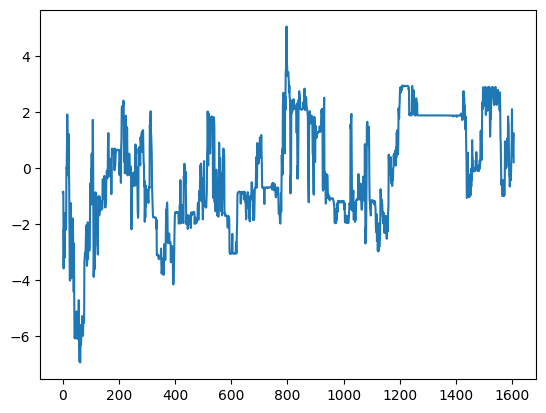

In [ ]:
plt.plot(learnable_loss_hist)
plt.show()

In [ ]:
(1-epoch/epochs)**2

0.6709248099999999

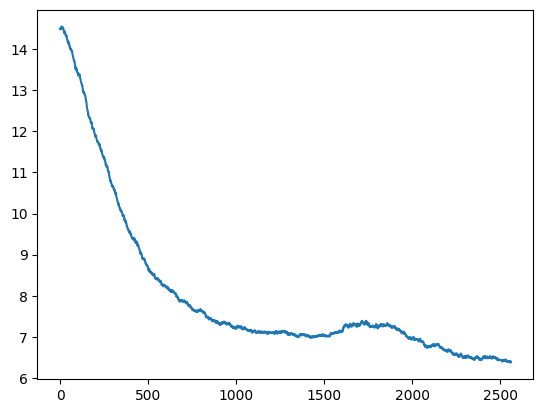

In [ ]:
plt.style.use('default')
plt.plot(loss_hist)
plt.show()

In [ ]:
x_test = np.reshape(x_test,(len(x_test),-1)).astype(np.float32)
predict = np.argmax(f_m(w,x_test),axis=1)
np.sum(predict==np.argmax(y_test,axis=1))/len(predict)

0.6459

In [ ]:
predict

array([7, 6, 1, ..., 4, 7, 5])

In [ ]:
np.sum(predict==np.argmax(y_test,axis=1))/len(predict)

0.4037

In [ ]:
base_model_block_length[0][0]
base_model_block_length

array([[[401408, 401408],
        [   512,    512]],

       [[262144, 262144],
        [   512,    512]],

       [[262144, 262144],
        [   512,    512]],

       [[  5120,   5120],
        [    10,     10]]])

In [ ]:
def get_legnth_of_each_variable(shape):
  lenght = shape.copy()
  for i in range(len(shape)):
    for j in range(len(shape[i])):
      lenght[i][j] = int(np.prod(shape[i][j]))
  return lenght
get_legnth_of_each_variable(base_model_shape.tolist())



[[401408, 512], [262144, 512], [262144, 512], [5120, 10]]

In [ ]:
base_model_shape[0][0]

array([784, 512])

In [ ]:
base_model_block_length[0][0]


array([401408, 401408])

In [ ]:
base_model_block_length[:,:,0]

array([[401408,    512],
       [262144,    512],
       [262144,    512],
       [  5120,     10]])

In [ ]:
def get_length(shape):
  length = 0
  for i in shape:
    for j in i:
      length = length + np.prod(j)
  return length

base_model_shape = [[[784,base_model_no_of_neurons],[1,base_model_no_of_neurons]],
                   [[base_model_no_of_neurons,base_model_no_of_neurons],[1,base_model_no_of_neurons]],
                   [[base_model_no_of_neurons,base_model_no_of_neurons],[1,base_model_no_of_neurons]],
                   [[base_model_no_of_neurons,1]],
                   ]
get_length(base_model_shape)

927744

In [ ]:
def get_legnth_of_each_variable(shape):
  lenght = shape.copy()
  for i in range(len(shape)):
    for j in range(len(shape[i])):
      lenght[i][j] = np.prod(shape[i][j])
  return lenght
get_legnth_of_each_variable(base_model_shape)

[[401408, 512], [262144, 512], [262144, 512], [512]]

In [ ]:
inputs = tf.concat([y_m,X,Y], axis=1)

In [ ]:
inputs.shape

TensorShape([60000, 804])

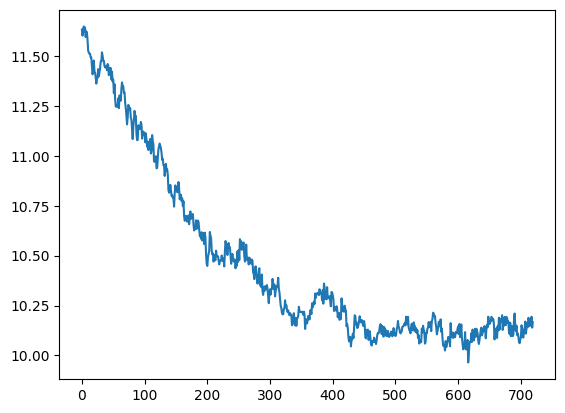

In [ ]:
plt.style.use('default')
plt.plot(loss_hist[290:])
plt.show()

In [ ]:
with tf.GradientTape() as g:
  g.watch(w)
  y_m = f_m(w,X)
  y_L = learnable_loss(theta,y_m,X,Y)
  d_L_L_d_w = g.gradient(y_L,w)
  d_L_L_d_w = convert_to_unit_vector(d_L_L_d_w)
with tf.GradientTape() as gg:
  gg.watch(w)
  y_m = f_m(w,X)
  loss = classical_loss(Y,y_m)  
  grad = gg.gradient(loss,w) 
  grad = convert_to_unit_vector(grad)
classical_loss(grad,d_L_L_d_w)

<tf.Tensor: shape=(), dtype=float32, numpy=2.3417517e-06>

In [ ]:
for epoch in range(5000):
  #update loss model
  for _ in range(1):
    with tf.GradientTape() as g:
        g.watch(theta)
        with tf.GradientTape() as gg:
            gg.watch(w)
            y_m = f_m(w,X)
            y_L = learnable_loss(theta,y_m,X,Y)
            G_LL = gg.gradient(y_L,w)
            L_L = classical_loss(Y,f_m(w-G_LL,X))
            G_LML = g.gradient(L_L,theta)
            G_LML = tf.clip_by_value(G_LML,-clip_value,clip_value)
            theta = theta - G_LML*0.001 

  # update base model
  for _ in range(1):
    with tf.GradientTape() as g:
        g.watch(w)
        y_m = f_m(w,X)
        y_L = learnable_loss(theta,y_m,X,Y)
        d_L_L_d_w = g.gradient(y_L,w)
        d_L_L_d_w = tf.clip_by_value(d_L_L_d_w,-clip_value,clip_value)

        w = w - d_L_L_d_w*0.001


  predict = f_m(w,X)
  loss = classical_loss(predict,Y).numpy()
  
  loss_hist = loss_hist + [loss]
  learnable_loss_hist = learnable_loss_hist + [y_L[0][0].numpy()]
  theta_hist = theta_hist + [theta.numpy()]
  w_hist = w_hist + [w.numpy()]
  if epoch % 50 == 0:
    print('base model gradient :',tf.reduce_mean(tf.abs(d_L_L_d_w)).numpy(),loss)
    print(epoch)

plt.style.use('default')
plt.plot(loss_hist)
plt.show()